# Viết code thực hiện các yêu cầu sau
Bài 1: Cho một chuỗi quan sát $\{x_1, \dots, x_n\}$.\
a. Viết hàm tìm trung bình mẫu $\bar{x}$\
b. Viết hàm tìm ACVF mẫu\
c. Viết hàm tìm ACF mẫu\
d. Vẽ đồ thị. Phân tích chuỗi quan sát dựa vào hàm ACF

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def sample_mean(observation_series):
    return np.mean(observation_series)

# Test
observations = [1, 2, 3, 4, 5]
mean = sample_mean(observations)
print("Sample Mean:", mean)

Sample Mean: 3.0


In [50]:
def sample_acvf(observation_series, lags):
    n = len(observation_series)
    mean = np.mean(observation_series)
    acvf = np.zeros(lags)

    for h in range(lags):
        # print(f"Lags: {h}")
        sum_term = 0
        for t in range(n - abs(h)):
            # print(f"{(observation_series[t + h])}, {observation_series[t]}")
            sum_term += (observation_series[t + h] - mean) * (observation_series[t] - mean)
        acvf[h] = sum_term / n

    return acvf

# Test
observations = [4, 2, 3, 4, 2, 3]
acvf_result = sample_acvf(observations, 6)
print("Sample ACVF:", acvf_result)


Sample ACVF: [ 0.66666667 -0.33333333 -0.16666667  0.33333333 -0.16666667  0.        ]


In [51]:
def sample_acf(observation_series, lags):
    acvf = sample_acvf(observation_series, lags)
    acf = acvf / acvf[0]  # Normalize by dividing by the ACVF at lag 0 (variance)
    return acf

# Test
acf_result = sample_acf(observations, 6)
print("Sample ACF:", acf_result)


Sample ACF: [ 1.   -0.5  -0.25  0.5  -0.25  0.  ]


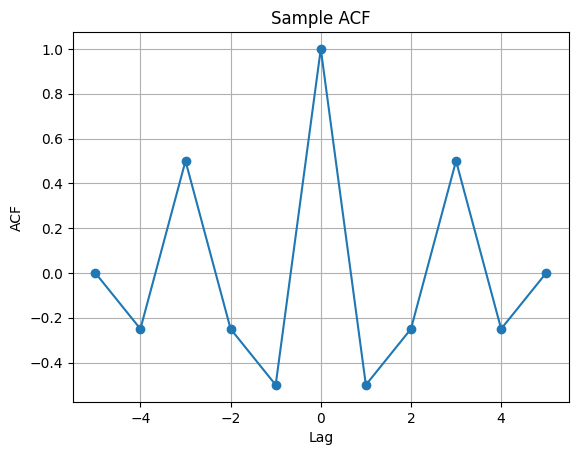

In [52]:
import matplotlib.pyplot as plt

def plot_acf(acf):
    n = len(acf)
    lags = list(range(-n+1, n))
    acf_extended = acf[::-1] + acf[1:]
    plt.plot(lags, acf_extended, marker='o', linestyle='-')
    plt.title("Sample ACF")
    plt.xlabel("Lag")
    plt.ylabel("ACF")
    plt.grid(True)
    plt.show()

# Test
acf_result = [1.0, -0.5, -0.25, 0.5, -0.25, 0.0]
plot_acf(acf_result)


Bài 2. Sử dụng chuỗi thời gian mô phỏng của tuần 4\
a. Phân tích chuỗi quan sát dựa vào hàm ACF\
b. Phân tích chuỗi quan sát của các thành phần xu thế, mùa và phần dư

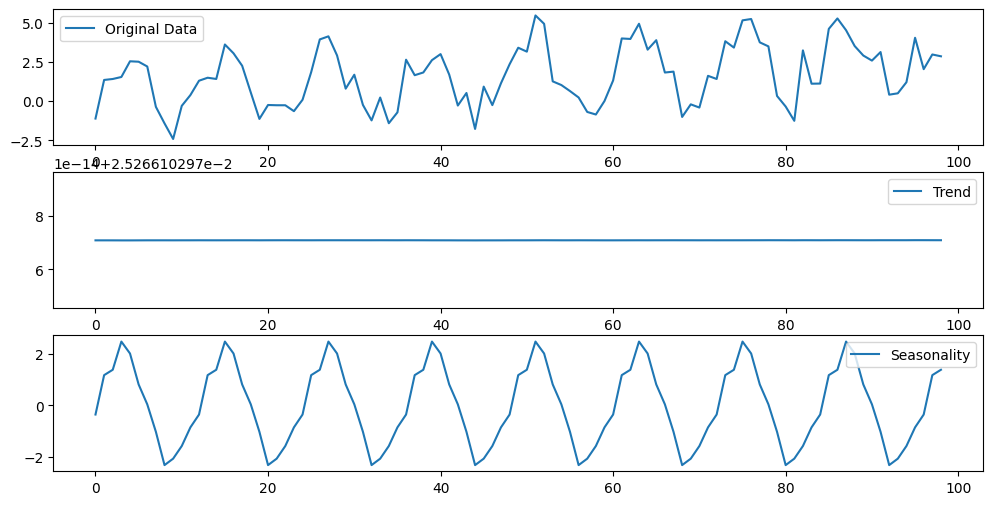

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Function to generate synthetic time series data with trends and seasons
def generate_time_series(timesteps, trend_coef, seasonal_coef, season_period):
    time = np.arange(timesteps)
    trend = trend_coef * time
    season = seasonal_coef * np.sin(2 * np.pi * time / season_period)
    noise = np.random.normal(0, 1, timesteps)
    time_series = trend + season + noise
    return time_series

# Simulate time series data
timesteps = 99
trend_coef = 0.03
seasonal_coef = 2.0
season_period = 12
simulated_data = generate_time_series(timesteps, trend_coef, seasonal_coef, season_period)

# Separating trends and seasons using Holt-Winters method
def separate_trend_season(data):
    model = ExponentialSmoothing(data, trend="add", seasonal="add", seasonal_periods=season_period)
    model_fit = model.fit(optimized=True)
    trend = model_fit.trend
    season = model_fit.season
    return trend, season

trend, season = separate_trend_season(simulated_data)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(simulated_data, label='Original Data')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(season, label='Seasonality')
plt.legend()

plt.show()


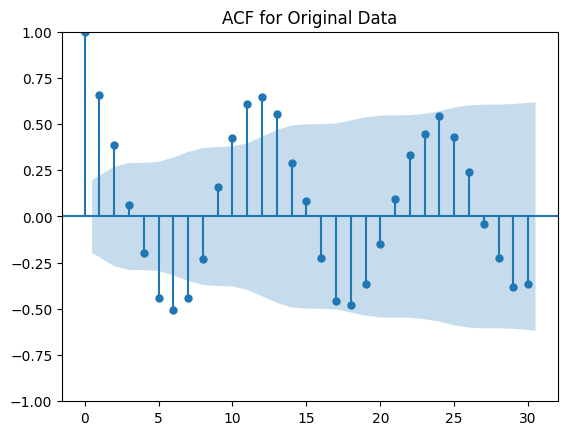

In [67]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# 1. Phan tich chuoi thoi gian theo ACF
acf_simulated_data = sm.tsa.acf(simulated_data, fft=False)
plot_acf(simulated_data, lags=30, title="ACF for Original Data")
plt.show()


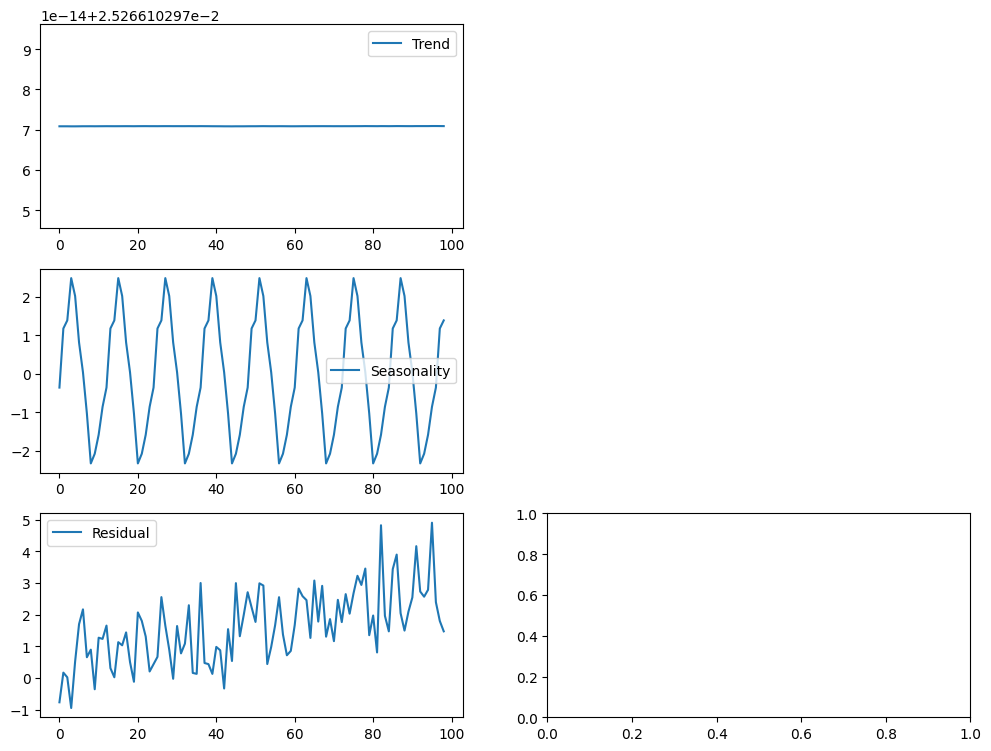

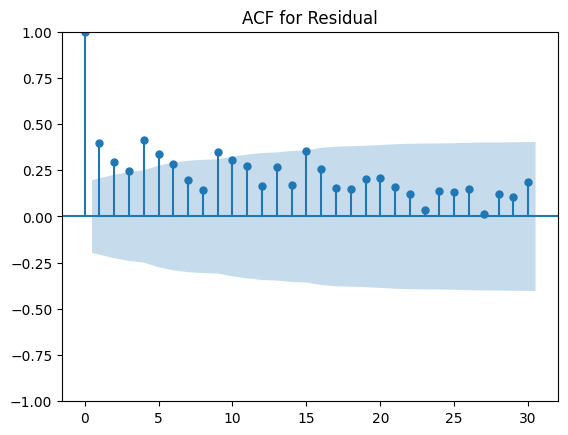

In [71]:
# Phan tich cac thanh phan theo ACF
acf_trend = sm.tsa.acf(trend, fft=False)
acf_season = sm.tsa.acf(season, fft=False)
residual = simulated_data - (trend + season)
acf_residual = sm.tsa.acf(residual, fft=False)

plt.figure(figsize=(12, 9))

plt.subplot(3, 2, 1)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(season, label='Seasonality')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(residual, label='Residual')
plt.legend()

plt.subplot(3, 2, 6)
plot_acf(residual, lags=30, title="ACF for Residual")

plt.show()


Bài 3. Cho chuỗi quan sát $\{x_1, \dots, x_n\}$
Hãy viết hàm xây dựng ma trận hiệp phương sai $R_h = [ACVF_{i-j}]_{i, j = \overline{1, h}}.$ Sau đó tìm:
$R_0, R_1, \dots, R_{n - 1}$

In [65]:
def autocovariance_matrix(observations, lags):
    n = len(observations)
    acov_matrix = np.zeros((n - 1, n - 1))

    for i in range(n - 1):
        for j in range(n - 1):
            acov_matrix[i, j] = sample_acvf(observations, lags)[i - j]

    return acov_matrix

# Test
acov_matrix = autocovariance_matrix(np.array(observations), 6)
print("Autocovariance Matrix:")
print(acov_matrix)

Autocovariance Matrix:
[[ 0.66666667  0.         -0.16666667  0.33333333 -0.16666667]
 [-0.33333333  0.66666667  0.         -0.16666667  0.33333333]
 [-0.16666667 -0.33333333  0.66666667  0.         -0.16666667]
 [ 0.33333333 -0.16666667 -0.33333333  0.66666667  0.        ]
 [-0.16666667  0.33333333 -0.16666667 -0.33333333  0.66666667]]
